In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from sklearn.metrics import mean_squared_error
import warnings
import seaborn as sb
from energy_model import *
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
files = glob.glob('results/**/brunswick**.csv')
files.sort()
files

['results/RCP2.6/brunswicknuclear_RCP2_6.csv',
 'results/RCP4.5/brunswicknuclear_RCP4_5.csv',
 'results/RCP6.0/brunswicknuclear_RCP6_0.csv',
 'results/RCP8.5/brunswicknuclear_RCP8_5.csv']

In [3]:
frames = []
ipcc_sc = [2.6,4.5,6.0,8.5]
for i,f in enumerate(files):
    df = pd.read_csv(f)
    df['ipcc'] = ipcc_sc[i]
    print(ipcc_sc[i])
    print(df.describe())
    frames.append(df)
brunswick_df = pd.concat(frames, axis=0)
brunswick_df.reset_index(inplace=True, drop=True)
brunswick_df.head()

2.6
       modeled_air_temps         simID          mean  modeled_stream_temps  \
count       72000.000000  72000.000000  72000.000000          72000.000000   
mean           19.147009     49.500000      1.000000             19.679356   
std             6.770366     28.866271      0.489901              6.612193   
min           -13.011418      0.000000      0.400000            -11.727768   
25%            14.563793     24.750000      0.400000             15.203216   
50%            19.136882     49.500000      1.000000             19.669465   
75%            23.740386     74.250000      1.600000             24.165420   
max            49.579857     99.000000      1.600000             49.401214   

          flow_rate        derate          ipcc  
count  7.200000e+04  72000.000000  7.200000e+04  
mean   6.197364e+10      0.938544  2.600000e+00  
std    1.051115e+13      0.173261  3.423063e-12  
min   -2.523832e+15      0.000000  2.600000e+00  
25%    6.778512e+10      0.990000  2.600000

,modeled_air_temps,simID,mean,modeled_stream_temps,flow_rate,derate,ipcc
0,15.338652,0,1.0,15.959972,7.136638e+10,0.99,2.6
1,24.345797,0,1.0,24.756687,1.338746e+11,0.99,2.6
2,27.087321,0,1.0,27.434162,1.825379e+11,0.96,2.6
3,22.527297,0,1.0,22.980671,1.137581e+11,0.99,2.6
4,17.323156,0,1.0,17.898112,7.954997e+10,0.99,2.6


In [4]:
mean_group = brunswick_df.groupby(['mean']).describe()
mean_group['derate']

,count,mean,std,min,25%,50%,75%,max
mean,,,,,,,,
0.4,24000.0,0.946420,0.159545,0.0,0.99,0.99,0.99,0.99
0.8,24000.0,0.943505,0.163982,0.0,0.99,0.99,0.99,0.99
0.9,24000.0,0.939825,0.169826,0.0,0.99,0.99,0.99,0.99
1.0,24000.0,0.937962,0.173696,0.0,0.99,0.99,0.99,0.99
1.3,24000.0,0.933915,0.181009,0.0,0.99,0.99,0.99,0.99
1.4,48000.0,0.931880,0.183358,0.0,0.99,0.99,0.99,0.99
1.6,24000.0,0.931250,0.185257,0.0,0.99,0.99,0.99,0.99
1.8,24000.0,0.925602,0.193485,0.0,0.99,0.99,0.99,0.99
2.0,48000.0,0.920962,0.202075,0.0,0.99,0.99,0.99,0.99


In [5]:
brunswick_df.head()

,modeled_air_temps,simID,mean,modeled_stream_temps,flow_rate,derate,ipcc
0,15.338652,0,1.0,15.959972,7.136638e+10,0.99,2.6
1,24.345797,0,1.0,24.756687,1.338746e+11,0.99,2.6
2,27.087321,0,1.0,27.434162,1.825379e+11,0.96,2.6
3,22.527297,0,1.0,22.980671,1.137581e+11,0.99,2.6
4,17.323156,0,1.0,17.898112,7.954997e+10,0.99,2.6


In [6]:
brunswick_df.groupby(['ipcc','mean']).mean()

modeled_air_temps  simID  modeled_stream_temps     flow_rate  \
ipcc mean                                                                 
2.6  0.4           18.523645   49.5             19.070555  9.051263e+10   
     1.0           19.202151   49.5             19.733209  1.305345e+11   
     1.6           19.715231   49.5             20.234302 -3.512616e+10   
4.5  0.9           19.105356   49.5             19.638676  8.014096e+10   
     1.4           19.587008   49.5             20.109075  1.115048e+11   
     2.0           20.193727   49.5             20.701620  2.921432e+10   
6.0  0.8           18.867295   49.5             19.406177  1.011134e+11   
     1.3           19.462397   49.5             19.987376  4.059564e+10   
     1.8           19.888020   49.5             20.403055  1.586762e+11   
8.5  1.4           19.608968   49.5             20.130523  1.641418e+11   
     2.0           20.095271   49.5             20.605464 -2.239522e+11   
     2.6           20.769943   49.5             21.264374  1.631068e+11   

             derate  
ipcc mean            
2.6  0.4   0.946420  
     1.0   0.937962  
     1.6   0.931250  
4.5  0.9   0.939825  
     1.4   0.932189  
     2.0   0.919765  
6.0  0.8   0.943505  
     1.3   0.933915  
     1.8   0.925602  
8.5  1.4   0.931572  
     2.0   0.922159  
     2.6   0.910948

<AxesSubplot:xlabel='modeled_air_temps', ylabel='derate'>

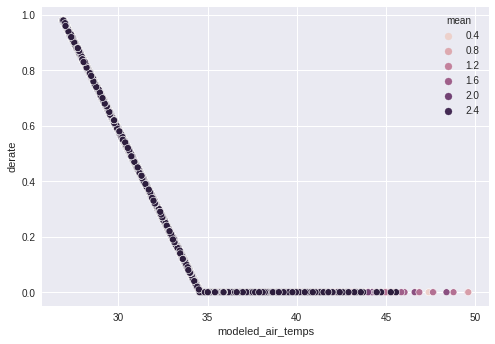

In [7]:
sb.scatterplot(x='modeled_air_temps',y='derate',data=brunswick_df[brunswick_df['derate']<0.99], hue='mean')

<AxesSubplot:>

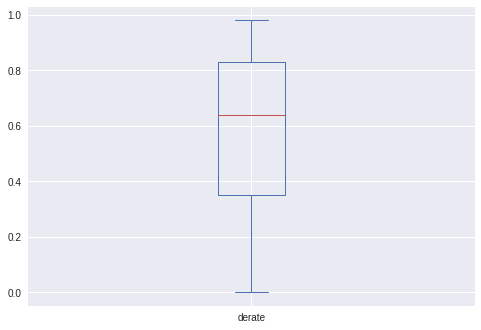

In [8]:
brunswick_df[brunswick_df['derate']<0.99]['derate'].plot.box()

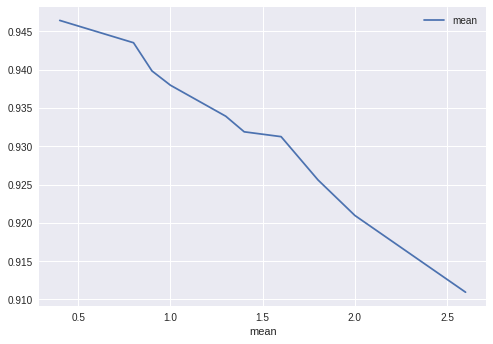

In [9]:
ax = mean_group['derate'].plot(y='mean')
# mean_group['derate'].plot()

In [10]:
simgroup = brunswick_df.groupby(['simID','mean']).mean()
simgroup['sigma'] = simgroup.index.get_level_values(1)
simgroup.head()

modeled_air_temps  modeled_stream_temps     flow_rate    derate  \
simID mean                                                                    
0     0.4           18.723864             19.266097  1.000277e+11  0.955542   
      0.8           19.041662             19.576470  6.247947e+10  0.928208   
      0.9           18.775231             19.316264  1.138984e+11  0.949042   
      1.0           18.670314             19.213797  1.544362e+11  0.943792   
      1.3           18.991755             19.527729  1.267761e+11  0.930042   

            ipcc  sigma  
simID mean               
0     0.4    2.6    0.4  
      0.8    6.0    0.8  
      0.9    4.5    0.9  
      1.0    2.6    1.0  
      1.3    6.0    1.3

<AxesSubplot:xlabel='modeled_air_temps', ylabel='derate'>

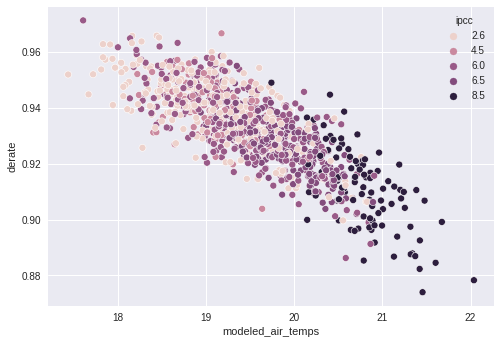

In [11]:
sb.scatterplot(data=simgroup,x='modeled_air_temps', y='derate', hue='ipcc')

In [12]:
model = linear_fit(simgroup[['modeled_air_temps','derate']])
y_pred = model.fittedvalues

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 derate   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1915.
Date:                Thu, 12 May 2022   Prob (F-statistic):          2.15e-234
Time:                        18:31:58   Log-Likelihood:                 3317.8
No. Observations:                1000   AIC:                            -6632.
Df Residuals:                     998   BIC:                            -6622.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.2511      0.007    171.577      0.000       1.237       1.265
modeled_air_temps    -0.0163      0.000    -43.764      0.000      -0.017      -0.016
==============================================================================
Omnibus:                        0.288   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.292
Skew:                          -0.041   Prob(JB):                        0.864
Kurtosis:                       2.986   Cond. No.                         515.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

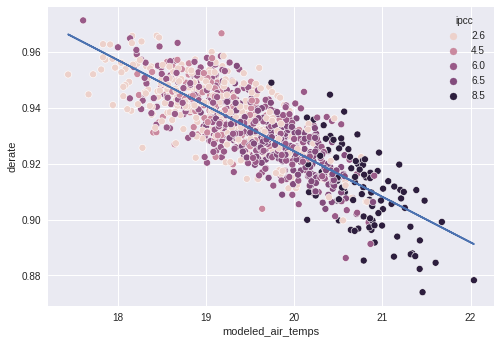

In [14]:
fig, ax = plt.subplots()
sb.scatterplot(data=simgroup,x='modeled_air_temps', y='derate', hue='ipcc', ax=ax)
ax.plot(simgroup.modeled_air_temps, y_pred)

In [15]:
simgroup.describe()

,modeled_air_temps,modeled_stream_temps,flow_rate,derate,ipcc,sigma
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,19.527652,20.051107,7.700082e+10,0.932227,5.180000,1.380000
std,0.744113,0.726729,7.137699e+11,0.014987,1.923356,0.614799
min,17.438894,18.011147,-1.656342e+13,0.874000,2.600000,0.400000
25%,19.024420,19.559631,9.540767e+10,0.922849,2.600000,0.900000
50%,19.507575,20.031498,1.144361e+11,0.932688,6.000000,1.350000
75%,20.022943,20.534825,1.350100e+11,0.943000,6.500000,1.800000
max,22.038417,22.503213,2.796021e+12,0.971333,8.500000,2.600000


In [16]:
brunswick_df.groupby('ipcc').describe()

modeled_air_temps                                                        \
                 count       mean       std        min        25%        50%   
ipcc                                                                           
2.6            72000.0  19.147009  6.770366 -13.011418  14.563793  19.136882   
4.5            72000.0  19.628697  6.755885 -12.811822  15.073906  19.613483   
6.0            72000.0  19.405904  6.770579 -10.495251  14.831311  19.410393   
8.5            72000.0  20.158061  6.754554  -6.102460  15.609077  20.125593   

                              simID        ...     flow_rate                \
            75%        max    count  mean  ...           75%           max   
ipcc                                       ...                               
2.6   23.740386  49.579857  72000.0  49.5  ...  1.236874e+11  4.510066e+14   
4.5   24.177950  49.602125  72000.0  49.5  ...  1.282521e+11  1.789757e+14   
6.0   23.960669  48.380492  72000.0  49.5  ...  1.260625e+11  4.205190e+14   
8.5   24.694515  46.860212  72000.0  49.5  ...  1.339724e+11  8.580845e+14   

       derate                                                   
        count      mean       std  min   25%   50%   75%   max  
ipcc                                                            
2.6   72000.0  0.938544  0.173261  0.0  0.99  0.99  0.99  0.99  
4.5   72000.0  0.930593  0.186350  0.0  0.99  0.99  0.99  0.99  
6.0   72000.0  0.934341  0.180045  0.0  0.99  0.99  0.99  0.99  
8.5   72000.0  0.921560  0.199987  0.0  0.99  0.99  0.99  0.99  

[4 rows x 48 columns]

In [17]:
ipcc_scen = brunswick_df.groupby(['ipcc'])


In [18]:
ipcc_scen.get_group(2.6)['derate'].sum()/72e3

0.9385436111111113

In [19]:
mean_group = brunswick_df.groupby(['mean']).mean()

In [20]:
len(mean_group.derate)

10

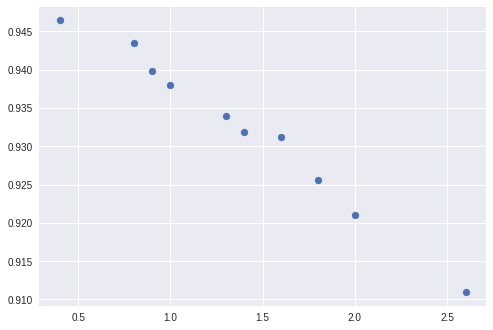

In [21]:
plt.scatter(mean_group.index, mean_group.derate)

In [22]:
plant_list = ['brownsferry',
 'brunswicknuclear',
 'calvertcliffsnuclearpowerplant',
 'coopernuclearstation',
#  'donaldccook',
 'jamesafitzpatrick',
 'mcguire',
 'millstone',
 'ninemilepointnuclearstation',
 'northanna',
 'oconee',
 'pointbeachnuclearplant',
 'quadcitiesgeneratingstation',
#  'seabrook',
 'stlucie',
 'surry']

In [23]:
mean_vals = np.zeros((10,len(plant_list))).T

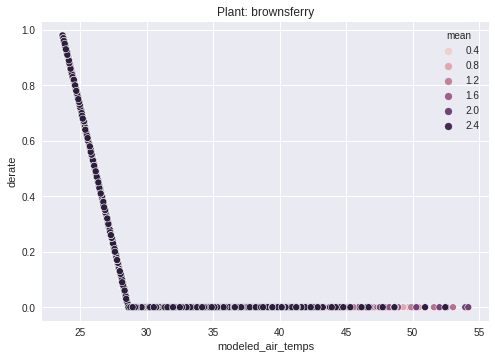

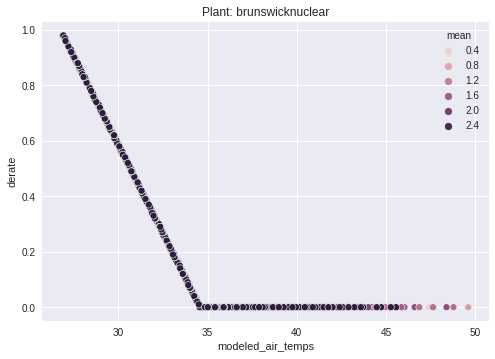

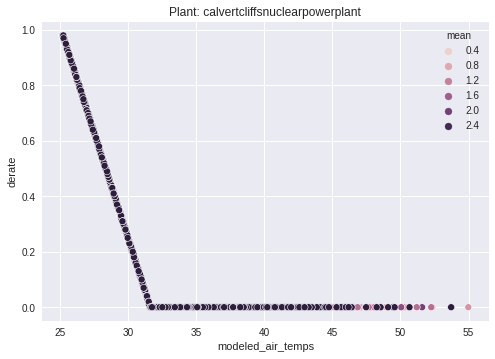

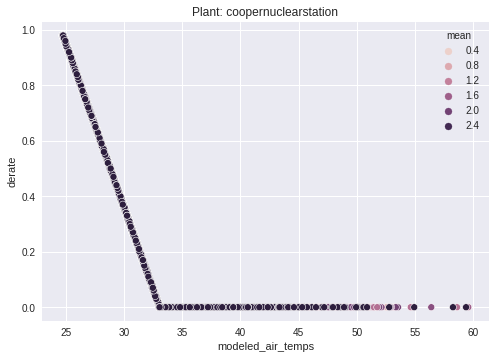

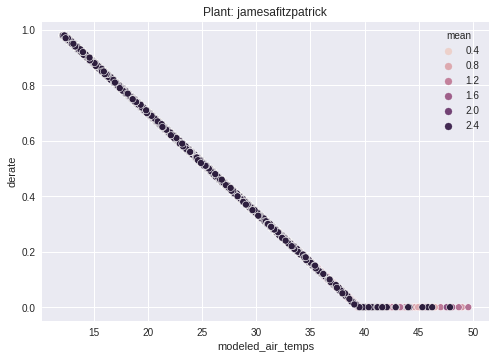

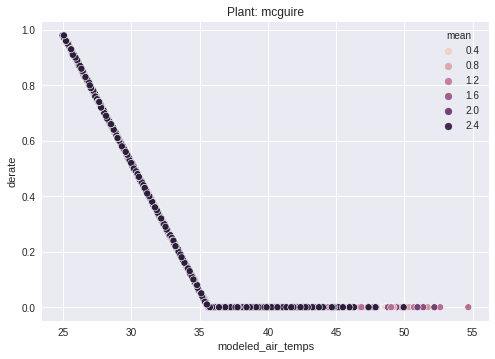

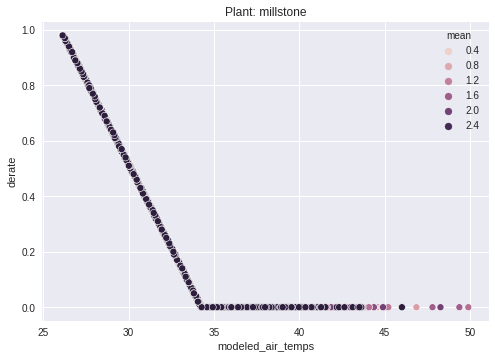

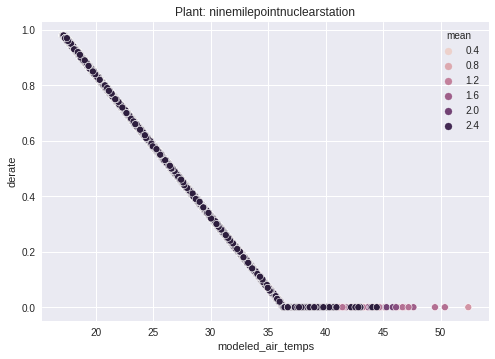

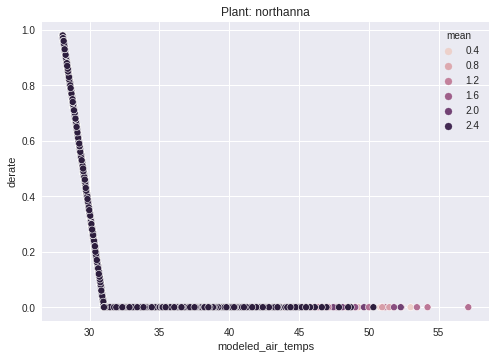

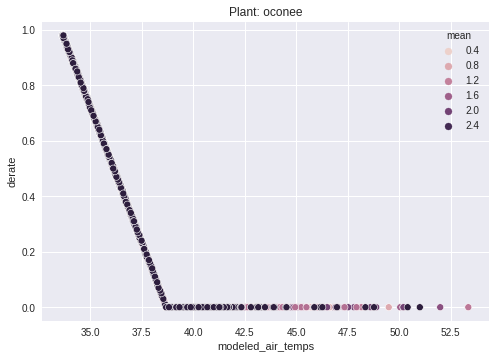

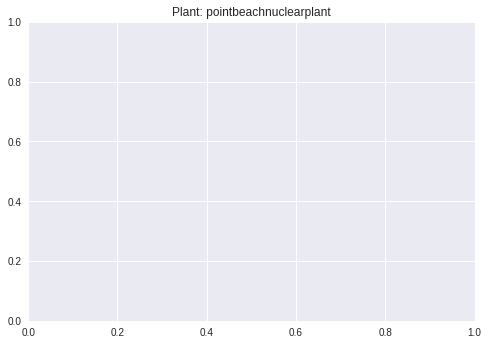

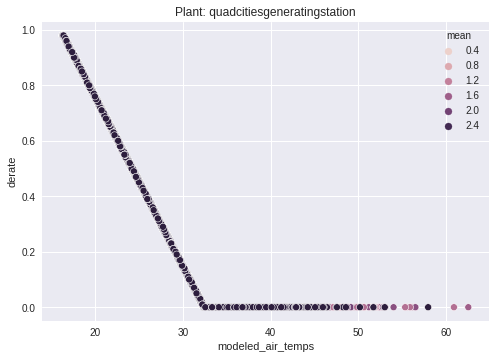

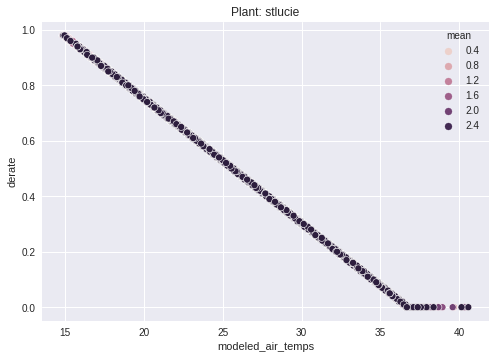

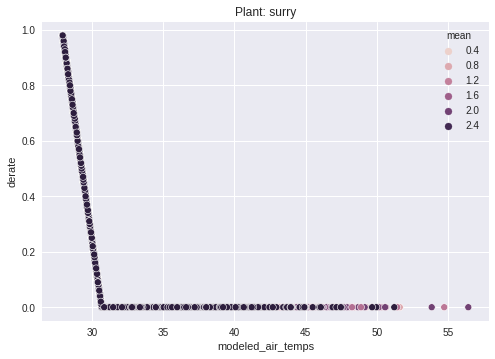

In [30]:
for j, p in enumerate(plant_list):
    files = glob.glob(f'results/**/{p}_**.csv')
    files.sort()
    
    frames = []
    ipcc_sc = [2.6,4.5,6.0,8.5]
    for i,f in enumerate(files):
        df = pd.read_csv(f)
        df['ipcc'] = ipcc_sc[i]
        frames.append(df)
    plantdf = pd.concat(frames, axis=0)
    plantdf.reset_index(inplace=True, drop=True)
    
    
    ax = sb.scatterplot(x='modeled_air_temps',y='derate',data=plantdf[plantdf['derate']<0.99], hue='mean')
    ax.set_title(f'Plant: {p}')
    plt.show()
    
    mean_group = plantdf.groupby(['mean']).mean()
    mean_vals[j] = mean_group.derate

In [25]:
mean_group

,modeled_air_temps,simID,modeled_stream_temps,flow_rate,derate,ipcc
mean,,,,,,
0.4,15.471136,49.5,18.661742,2.176175e+11,0.939486,2.6
0.8,15.769140,49.5,18.956218,2.916220e+11,0.934919,6.0
0.9,15.936938,49.5,19.122028,1.521649e+11,0.933315,4.5
1.0,15.945601,49.5,19.130589,2.675275e+10,0.931804,2.6
1.3,16.255677,49.5,19.436993,1.336130e+11,0.928140,6.0
1.4,16.409565,49.5,19.589058,-6.928351e+11,0.925042,6.5
1.6,16.648055,49.5,19.824724,1.317602e+11,0.923455,2.6
1.8,16.784205,49.5,19.959262,1.247813e+11,0.919708,6.0
2.0,17.043933,49.5,20.215914,1.118482e+11,0.915850,6.5


In [26]:
mean_vals

array([[0.86667792, 0.86445917, 0.86278542, 0.86064875, 0.84974875,
        0.84960021, 0.84357125, 0.84092125, 0.83355437, 0.81321167],
       [0.94641958, 0.943505  , 0.93982458, 0.93796167, 0.933915  ,
        0.93188042, 0.93124958, 0.92560208, 0.92096229, 0.91094833],
       [0.92773125, 0.92324542, 0.92239125, 0.92084667, 0.9170775 ,
        0.91661958, 0.91276458, 0.90879792, 0.90629938, 0.89414   ],
       [0.93806167, 0.93478625, 0.93083208, 0.93182625, 0.92844792,
        0.92837521, 0.92614083, 0.9253    , 0.92069354, 0.91290333],
       [0.9010275 , 0.89586042, 0.89308292, 0.89124708, 0.88668167,
        0.88499792, 0.88087708, 0.88004333, 0.87606854, 0.8652925 ],
       [0.94170167, 0.93890042, 0.93604042, 0.93627125, 0.93250417,
        0.93003229, 0.92795   , 0.92300292, 0.92265   , 0.90935167],
       [0.97396583, 0.97264958, 0.97147458, 0.9714925 , 0.97049833,
        0.96966   , 0.96771042, 0.96674833, 0.96574479, 0.96142375],
       [0.93746625, 0.93097417, 0.9326458

In [27]:
mean_vals.std(axis=0)*2

array([0.20669516, 0.21558613, 0.21669037, 0.21922143, 0.2257849 ,
       0.22641806, 0.2312242 , 0.23475267, 0.23832216, 0.249765  ])

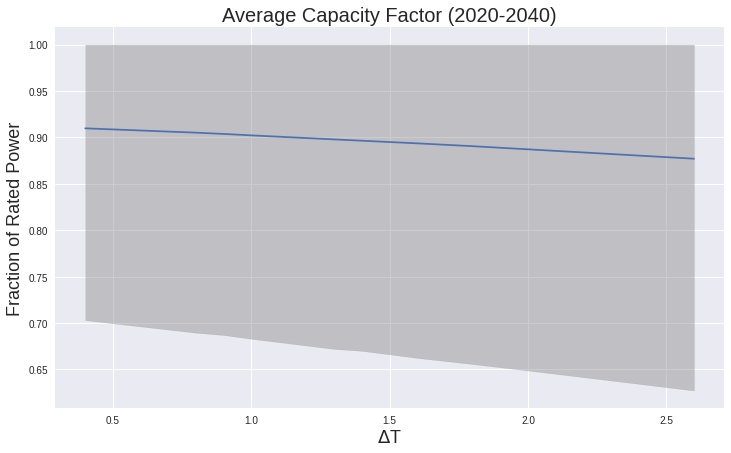

In [28]:
plt.figure(figsize=(12,7))
plt.plot(mean_group.index,mean_vals.mean(axis=0), label='Mean')
plt.fill_between(mean_group.index, (mean_vals.mean(axis=0) - 2*mean_vals.std(axis=0)),
                 np.ones(10), alpha=0.4, color='grey', label='95% Confidence')
plt.xlabel(r'$\Delta$T', fontsize=18)
plt.ylabel(r'Fraction of Rated Power', fontsize=18)
plt.title('Average Capacity Factor (2020-2040)', fontsize=20)
plt.show()